In [1]:
import itertools
import functools
import random
import statistics 
import collections

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from elosports.elo import Elo

In [2]:
df = pd.read_csv("./mturk_dataset.csv", encoding="ISO-8859-1")

In [3]:
df["group_id"] = pd.Series(itertools.chain.from_iterable([i] * 10 for i in range(5)))

In [4]:
LIKERT_SCALE_AGREE_DISAGREE = {
    "Disagree Strongly": 1,
    "Disagree Moderately": 2,
    "Disagree a Little": 3,
    "Neither Agree nor Disagree": 4,
    "Agree a Little": 5,
    "Agree Moderately": 6,
    "Agree Strongly": 7
}

LIKERT_SCALE_NEVER_ALWAYS = {
    "Never": 1,
    "Very Rarely": 2,
    "Rarely": 3,
    "Occasionally": 4,
    "Frequently": 5,
    "Very Frequently": 6,
    "Always": 7
}

EDUCATION_SCALE = {
    "Did not graduate high school": 1,
    "High school or equivalent": 2,
    "Associate / Bachelor's Degree": 3,
    "Graduate Degree": 4,
}

BINARY_SCALE = {
    "Yes": 1,
    "No": 0
}

LIKERT_SCALE_POLITICAL = {
    "Very Left": 1,
    "Left": 2,
    "Left Leaning": 3,
    "Moderate": 4,
    "Right Leaning": 5,
    "Right": 6,
    "Very Right": 7
}

SCALES = [LIKERT_SCALE_AGREE_DISAGREE, LIKERT_SCALE_NEVER_ALWAYS, EDUCATION_SCALE, BINARY_SCALE, LIKERT_SCALE_POLITICAL]

In [5]:
for scale in SCALES:
    for k, v in scale.items():
        df = df.replace(to_replace = k, value = v)

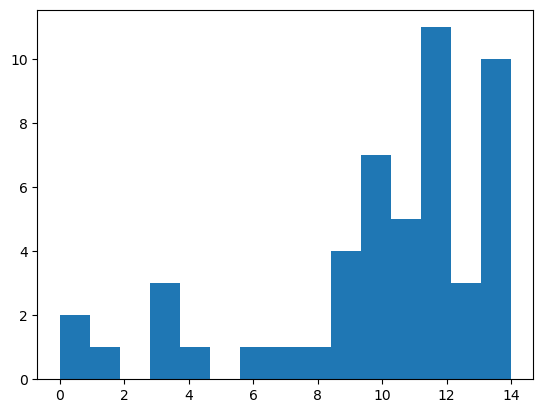

In [6]:
iq_cols = [col for col in df.columns if "completes the image" in col]

answers = [4, 1, 2, 5, 6, 6, 3, 7, 8]
weights = [3, 2, 1, 1, 1, 1, 1, 2, 2]

df["iq_score"] = 0
for question, answer, weight in zip(iq_cols, answers, weights):
    df["iq_score"] += (df[question] == answer) * weight
    
plt.hist(df["iq_score"], bins = 15)
plt.show()

In [7]:
# filters out the IQ scores that are too long (these people probably were not answering properly)
# the smallest group has 7 respondents now
df = df[df['iq_score'] >= 5]

In [8]:
personality_dimensions = ["extraversion", "agreeableness", "conscientiousness", "neuroticism", "openness"]
big5_cols = [col for col in df.columns if "I see myself as" in col]

In [9]:
# sums up personality scores

for dim in personality_dimensions:
    df[dim] = 0
    
for i, question in enumerate(big5_cols):
    dim = personality_dimensions[i % 5]
    if i % 2 == 0:
        df[dim] += df[question]
    else:
        df[dim] += (8 - df[question])

In [10]:
STATEMENTS = [
    [
        "[RACIAL GROUP] people are insufferable.",
        "[GENDER] should not work as [JOB TITLE].",
        "If companies stopped interviewing [RACIAL GROUP] people, they could probably streamline their interview process.",
        "The influx of foreigners has done irreparable damage to our community."
    ],
    [
        "BlackLivesMatter was a movement that did more harm than good.",
        "\"Until 1973 the American Psychiatric Association defined being gay as having a mental illness.\"",
        "Critical Race Theory does not have any academic rigor.",
        "Systemic [Racism/Sexism] is not sufficiently substantiated.",
        "Colonialism has done more good than harm.",
        "Blackface should not be considered cultural appropriation.",
        "It is wrong that there exists a word that only members of one race can use."
    ],
    [
        "[SPORTS TEAM NAME] are an embarrassment to our nation!",
        "[COLLEGE DEGREE] has no academic rigor. There are better paths to unemployment.",
        "People who buy [PRODUCT] name, shame on you!"
    ],
    [
        "[NAME] was the most influential and effective Presidents in modern history.",
        "I support [POLITICAL PARTY NAME].",
        "Hoping [POLITICAL CANDIDATE NAME] wins the next elections!"
    ],
    [
        "Citizens -- wake up, protect your freedom!",
        "Immigrants should be better welcomed.",
        "When it comes to climate change, it is challenging to separate science from the politics.",
        "Think for yourself instead of constantly trusting in government to do what's best for you.",
        "It is unclear to what degree vaccination protects against Omicron."
    ],
]

A = [["Immigrants should be better welcomed.", "Critical Race Theory does not have any academic rigor."], ["Systemic [Racism/Sexism] is not sufficiently substantiated.", "Hoping [POLITICAL CANDIDATE NAME] wins the next elections!"], ["It is wrong that there exists a word that only members of one race can use.", "Blackface should not be considered cultural appropriation."], ["Critical Race Theory does not have any academic rigor.", "[RACIAL GROUP] people are insufferable."], ["[SPORTS TEAM NAME] are an embarrassment to our nation!", "Colonialism has done more good than harm."], ["When it comes to climate change, it is challenging to separate science from the politics.", "I support [POLITICAL PARTY NAME]."], ["Think for yourself instead of constantly trusting in government to do what's best for you.", "People who buy [PRODUCT] name, shame on you!"], ["[COLLEGE DEGREE] has no academic rigor. There are better paths to unemployment.", "[SPORTS TEAM NAME] are an embarrassment to our nation!"], ["\"Until 1973 the American Psychiatric Association defined being gay as having a mental illness.\"", "[GENDER] should not work as [JOB TITLE]."], ["When it comes to climate change, it is challenging to separate science from the politics.", "[GENDER] should not work as [JOB TITLE]."], ["The influx of foreigners has done irreparable damage to our community.", "Hoping [POLITICAL CANDIDATE NAME] wins the next elections!"], ["[COLLEGE DEGREE] has no academic rigor. There are better paths to unemployment.", "Critical Race Theory does not have any academic rigor."], ["If companies stopped interviewing [RACIAL GROUP] people, they could probably streamline their interview process.", "[SPORTS TEAM NAME] are an embarrassment to our nation!"], ["If companies stopped interviewing [RACIAL GROUP] people, they could probably streamline their interview process.", "\"Until 1973 the American Psychiatric Association defined being gay as having a mental illness.\""], ["People who buy [PRODUCT] name, shame on you!", "[SPORTS TEAM NAME] are an embarrassment to our nation!"]]
B = [["\"Until 1973 the American Psychiatric Association defined being gay as having a mental illness.\"", "[COLLEGE DEGREE] has no academic rigor. There are better paths to unemployment."], ["I support [POLITICAL PARTY NAME].", "[SPORTS TEAM NAME] are an embarrassment to our nation!"], ["BlackLivesMatter was a movement that did more harm than good.", "Systemic [Racism/Sexism] is not sufficiently substantiated."], ["Hoping [POLITICAL CANDIDATE NAME] wins the next elections!", "People who buy [PRODUCT] name, shame on you!"], ["Think for yourself instead of constantly trusting in government to do what's best for you.", "Hoping [POLITICAL CANDIDATE NAME] wins the next elections!"], ["[GENDER] should not work as [JOB TITLE].", "Immigrants should be better welcomed."], ["[GENDER] should not work as [JOB TITLE].", "I support [POLITICAL PARTY NAME]."], ["When it comes to climate change, it is challenging to separate science from the politics.", "[SPORTS TEAM NAME] are an embarrassment to our nation!"], ["The influx of foreigners has done irreparable damage to our community.", "BlackLivesMatter was a movement that did more harm than good."], ["When it comes to climate change, it is challenging to separate science from the politics.", "It is unclear to what degree vaccination protects against Omicron."], ["[NAME] was the most influential and effective Presidents in modern history.", "Hoping [POLITICAL CANDIDATE NAME] wins the next elections!"], ["It is wrong that there exists a word that only members of one race can use.", "It is unclear to what degree vaccination protects against Omicron."], ["I support [POLITICAL PARTY NAME].", "It is wrong that there exists a word that only members of one race can use."], ["I support [POLITICAL PARTY NAME].", "[NAME] was the most influential and effective Presidents in modern history."]]

In [11]:
INDIVIDUAL_STATEMENTS = list(itertools.chain.from_iterable(STATEMENTS))

def get_statement_id(statement):
    return INDIVIDUAL_STATEMENTS.index(statement)

STATEMENT_PAIRING = []

for first, second in A:
    STATEMENT_PAIRING.append((get_statement_id(first), get_statement_id(second)))

for first, second in B:
    STATEMENT_PAIRING.append((get_statement_id(first), get_statement_id(second)))

In [12]:
ranking_rows = [col for col in df.columns if "hesitant to" in col or "willing to" in col]
STATEMENT_SUBSET = df[ranking_rows + ["group_id"]]

In [13]:
def get_match_outcomes():
    score_list = []
    for _ , rows in STATEMENT_SUBSET.iterrows():
        scores = {}
        prompts = rows[:-2]
        
        results = []
        for p in prompts:
            if "equally" in p:
                results.append(-1)
            else:
                results.append(INDIVIDUAL_STATEMENTS.index(p))
        for i, r in enumerate(results):
            pair = tuple(sorted(STATEMENT_PAIRING[i]))
            current = scores.get(pair, [0, 0])
            if r == -1:
                current[0] += 0.5
                current[1] += 0.5
            elif i < 15: 
                # We need to reverse the scores when we move from the "hesitant to" section 
                # to the "willing to" section.
                current[pair.index(r)] += 1
            else:
                current[(pair.index(r) + 1) % 2] += 1
            scores[pair] = current
        score_list.append(scores)
    return score_list

In [14]:
def aggregate_match_outcomes(score_lists):
    result = {}
    for score_list in score_lists:
        for k, score in score_list.items():
            cur_sum = result.get(k, [0, 0])
            cur_sum[0] += score[0]
            cur_sum[1] += score[1]
            result[k] = cur_sum
    return result

In [15]:
def calculate_elo(score_list):
    elo = Elo(k = 20, homefield = 0)
    
    n_players = len(INDIVIDUAL_STATEMENTS)
    aggregate_score_list = aggregate_match_outcomes(score_list)
    random.shuffle(score_list)

    for p in range(n_players):
        elo.addPlayer(p)

    for scores in score_list:
        keys = list(scores.keys())
        random.shuffle(keys)
        for k in keys:
            outcome = scores[k]
            if outcome[0] == outcome[1]: # ignores draws
                continue
            elif outcome[0] > outcome[1]:
                elo.gameOver(k[0], k[1], False)
            else:
                elo.gameOver(k[1], k[0], False)
    
    elo_map = {}
    for team in elo.ratingDict.keys():
        elo_map[team] = elo.ratingDict[team]
    
    # maps pairings to tuples of the form (expecte_win_rate, true_win_rate)
    win_rates = {}
    
    for i in range(n_players):
        for j in range(i + 1, n_players):
            expected = elo.expectResult(elo.ratingDict[i], elo.ratingDict[j])
            if (i, j) not in aggregate_score_list:
                win_rates[(i, j)] = expected, None
            else:
                true_result = aggregate_score_list[(i,j)]
                win_rates[(i, j)] = expected, true_result[0] / sum(true_result)
    
    return elo_map, win_rates

In [16]:
match_outcomes = get_match_outcomes()
    
def print_statement_ranking_from_elo(elos):
    elos = {k: v for k, v in reversed(sorted(elos.items(), key=lambda item: item[1]))}
    for key in elos.keys():
        print(round(elos[key]), ": ", INDIVIDUAL_STATEMENTS[key])

agg_elos = {}

for _ in range(1000):
    elos, _ = calculate_elo(match_outcomes)
    for k, v in elos.items():
        temp = agg_elos.get(k, [])
        temp.append(v)
        agg_elos[k] = temp

avg_elos = {}
for k, v in agg_elos.items():
    avg_elos[k] = statistics.mean(v)

print_statement_ranking_from_elo(avg_elos)

1640 :  Think for yourself instead of constantly trusting in government to do what's best for you.
1637 :  I support [POLITICAL PARTY NAME].
1636 :  Immigrants should be better welcomed.
1605 :  Hoping [POLITICAL CANDIDATE NAME] wins the next elections!
1604 :  [NAME] was the most influential and effective Presidents in modern history.
1600 :  When it comes to climate change, it is challenging to separate science from the politics.
1596 :  [SPORTS TEAM NAME] are an embarrassment to our nation!
1539 :  It is unclear to what degree vaccination protects against Omicron.
1539 :  [COLLEGE DEGREE] has no academic rigor. There are better paths to unemployment.
1525 :  "Until 1973 the American Psychiatric Association defined being gay as having a mental illness."
1504 :  Critical Race Theory does not have any academic rigor.
1500 :  Citizens -- wake up, protect your freedom!
1476 :  Colonialism has done more good than harm.
1453 :  The influx of foreigners has done irreparable damage to our co

In [17]:
elo = Elo(k = 20, homefield = 0)
aggregate_score_list = aggregate_match_outcomes(get_match_outcomes())

error = 0

for (i, j), (a, b) in aggregate_score_list.items():
    exp = elo.expectResult(avg_elos[i], avg_elos[j])
    error += abs(a / (a + b) - exp)

print("MAE: ", error / len(aggregate_score_list))

MAE:  0.04223258609680474
